#### This notebook is implemented by LMSC group at EPFL for analysis of CL maps with SEM-CL Attolight

In [ ]:
import HspyPrep as hsp
import matplotlib.pyplot as plt
import numpy as np
import hyperspy.api as hs
import pandas as pd
import os
from new_cd import CondAns
# %matplotlib qt

## Importing the Data

#### In this section you will be able to import your data to the jupyter notebook

In [ ]:
## In this cell you will need to specify the path to the folder containing the data you want to analyze
## This code will create a dictionary containing the paths to all the folders containing the data you want to analyze
root_file_path = './KAMYAR_tEMPERATURE_sERIES/'
dict_of_files = dict()
counter = 0
for file in os.listdir(root_file_path):
    if 'HYP' in file:
        ## if the background spectra is in the file, set the contain_bg to True and if not set it to False
        dict_of_files[file] = hsp.HspyPrep(root_file_path + file + '/', step=1, whole_seconds=64*64, contain_bg=True)

print(dict_of_files)

#### This cell will remove the background from the spectra and also it will remove noises

In [ ]:
# def key_value_in_thousands(key):
#     num_str = key.split("-", 1)[1]
#     return int(num_str.rstrip("K"))

# sorted_items = sorted(dict_of_files.items(), key=lambda kv: key_value_in_thousands(kv[0]))
# dict_of_files = {k: v for k, v in sorted_items}

print(dict_of_files.keys())


In [ ]:
# del dict_of_files['HYP-10K_200PA']
# del dict_of_files['HYP-10K_STD']
# # del dict_of_files['HYP-THIN-BOTH-5KEV']
# del dict_of_files['HYP-5KEV_THIN']
# del dict_of_files['HYP-2KEV-THICK']
# del dict_of_files['HYP-2KEV-THIN']
# # del dict_of_files['HYP-5KEV_THICK']
# # del dict_of_files['HYP-5KEV_THIN']
# del dict_of_files['HYP-8KEV-THIN']
# del dict_of_files['HYP-4KEV-THICK']
# del dict_of_files['HYP-4KEV-THICK-001']
# del dict_of_files['HYP-THIN-BOTH-5KEV']
# del dict_of_files['HYP-THIN-BOTH-3KEV']
# del dict_of_files['HYP-4KEV-THICK-001']

In [ ]:
## kernel size for the median filter to remove noise from the data 
kernel_size = 17

for key, hspyobj in dict_of_files.items():
    hspyobj.remove_background()
    hspyobj.apply_filter_noises(kernel_size=kernel_size)

In [ ]:
dict_of_files['HYP-5KEV_THICK'].get_hyperspy_obj().plot()

?# Data Visualization

### In this section each data can be visualized using the hspyprep library. You can see the spectra of your image through the map 

In [ ]:
# With this code you can just check the results with Hyperspy
# dict_of_files["HYP_name_of_the_file"].get_hyperspy_obj().plot()
# With this function you can plot the heat map of emissions
for i in dict_of_files.keys():
    dict_of_files[i].plot_heatmap((890, 920), vmin=10000, vmax=100000)


In [ ]:
dict_of_files["HYP-20K"].get_hyperspy_obj().plot()
# dict_of_files["HYP-3KEV-THICK"].get_hyperspy_obj().plot()
# dict_of_files["HYP-4KEV-THICK-001"].get_hyperspy_obj().plot()
# dict_of_files["HYP-8KEV-THICK"].get_hyperspy_obj().plot()

In [ ]:
dict_of_files['HYP-240814-B-PEELED-10K-50X50-6X6UM'].plot_heatmap_overlay((970, 1010), vmin=3000, vmax=8000, alpha=0.5)


In [ ]:
dict_of_files['HYP-240814-B-PEELED-10K-50X50-6X6UM'].plot_heatmap_overlay((880, 920), vmin=3000, vmax=8000, alpha=0.5)


In [ ]:
dict_of_files['HYP-240829-A-PEELED-ZEROORDER-128X128PX-10X10UM'].plot_heatmap((890, 920), vmin=10, vmax=100000)


In [ ]:
print(dict_of_files.keys())


## Gathered data Analysis

In this section, all of the measurements that is conducted were gathered and a library would create all of the information about all the measurements together in various conditions 

In [ ]:
# import CondAns
# to this library you need to give the dictionary that is created before
# This library process all the data within the dictionary. If you want to remove a specific experiment, you need to remove the key related to that experiment
# If you have run the map_all_pixel function before, you can just set load_mapping tp True. In this case, map coordinates will be loaded to the object and no need to rerun the mapping part. 

test = CondAns(dict_of_files, ref='HYP-10K', addr_file='KAMYAR_tEMPERATURE_sERIES', load_mapping=False)

In [ ]:
test.single_exp_plot('HYP-10K_1NA', 19,31)


In [ ]:
# You need to run the mapping when you have a set of experiments. This will allow you to find the same location from all maps. 
test.map_all_pixels(window_size=11, max_disp=11, ref='HYP-6H-10K')

Below You can find different functions that can plot and visualize all maps. Also with these codes you can simply save the plots or the fitting parameters. 

In [ ]:
test.all_pixels_with_fit(filename='Test_fitting_Excel_2', max_peaks=4, height=30, x_pixel=5, y_pixel=5)
# test.data_coordinates 

In [ ]:
test.plot_all_pixels((20,10),x_pixel=10, y_pixel=10, save=False, show_plots=True)

In [ ]:
%matplotlib widget

test.interactive_plot_fitted_data_all('Dec 20th-CL Current Series/fitting', 10, 35)

In [ ]:
string = dict()

In [ ]:
%matplotlib widget


test.interactive_peak_fit_manual('HYP-240806-C-PEELED-10K-50X50-6X6UM', 0, 0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# fetch your x-axis once
x = dict_of_files['HYP-5KEV_THICK'].get_wavelengths()

# number of spectra
N = 20

# set up an inferno colormap and a normalizer over your indices 0…N-1
cmap = cm.get_cmap('inferno', N)
norm = colors.Normalize(vmin=0, vmax=N-1)

plt.figure(figsize=(8, 5))

for idx in range(N):
    # pull out raw data
    y = dict_of_files['HYP-5KEV_THICK'].hsp_obj_file_path.data[8 + idx][47]
    # normalize by its own max
    y_norm = y / np.max(y)
    # pick a color from inferno
    color = cmap(norm(idx))
    # plot with label
    plt.plot(x, y_norm, color=color, label=f"Slice {8 + idx}")

plt.xlabel("Wavelength")
plt.ylabel("Normalized Intensity")
plt.title("Normalized HYP-5KEV_THICK Spectra (Inferno cmap)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # legend outside
plt.tight_layout()
plt.xlim(850, 1000)  # adjust x-limits as needed
plt.ylim(0.6, 1.2)  # adjust y-limits as needed
plt.show()


In [ ]:
string[(25,55)] = dict(test.params_fit)

In [ ]:
string.keys()

In [ ]:
string[(25,55)]

In [ ]:
# assume your data lives in a dict called `data`, e.g.
# data = {
#     (8,40): { 'p0_center': <Parameter ...>, 'p1_center': <Parameter ...>, ... },
#     (8,55): { ... },
#     ...
# }

# define your center‐ranges
ranges = {
    'p0': (880, 930),
    'p1': (940, 1010),
}

# prepare an output dict
classified = {}

for coords, params in string.items():
    # for each spot, collect its centers
    peaks = {'p0': [], 'p1': [], 'p2': []}
    for name, param in params.items():
        if not name.endswith('_center'):
            continue
        cx = param.value  # the numeric center
        # classify by range
        if ranges['p0'][0] <= cx <= ranges['p0'][1]:
            peaks['p0'].append(cx)
        elif ranges['p1'][0] <= cx <= ranges['p1'][1]:
            peaks['p1'].append(cx)
        else:
            peaks['p2'].append(cx)
    classified[coords] = peaks

# `classified` now maps each (row,col) to a dict of lists of centers, e.g.:
# {
#   (8,40): { 'p0': [897.25], 'p1': [], 'p2': [811.05] },
#   (8,55): { ... },
#    ...
# }


In [ ]:
import re
from decimal import Decimal, getcontext

# Set very high precision
getcontext().prec = 50

# Constants in SI units with exact values
h = Decimal("6.62607015e-34")       # Planck constant [J·s]
c = Decimal("299792458")            # Speed of light [m/s]
e = Decimal("1.602176634e-19")      # Elementary charge [C = J/eV]

# hc/e in eV·m
hc_over_e = (h * c) / e  # ≈ 1.239841984... × 10^-6 eV·m

# Your data string
data = """
p0_:
    amplitude =   8778.959  ± 500.424
    center    =    971.946  ± 1.420
    sigma     =     19.298  ± 1.063
    fwhm      =     69.499  ± 3.827
    gamma     =     19.298
    height    =     94.944
  p1_:
    amplitude =  36219.482  ± 406.073
    center    =    918.454  ± 0.082
    sigma     =     13.995  ± 0.140
    fwhm      =     27.990  ± 0.279
    height    =    823.791
"""

# Extract wavelengths (in nm) and convert them to Decimal
centers_nm = re.findall(r'center\s+=\s+([0-9.]+)', data)
centers_m = [Decimal(wl) * Decimal("1e-9") for wl in centers_nm]

# Convert each wavelength to energy
energies_ev = [hc_over_e / wl for wl in centers_m]

# Store in dictionary and print
energy_dict = {f"p{i}_": energy for i, energy in enumerate(energies_ev)}

for label, energy in energy_dict.items():
    print(f"{label} energy = {energy} eV")


In [ ]:
## Data for the HE and LE two peaks region for Energy analysis 5 keV
data = """
16, 48, HE=889.930, LE=960.649,

"""

In [ ]:
## Data for the HE and LE two peaks region for current analysis 1NA
data = """
(10, 27), HE=918.454, LE=0.0,
(10, 28), HE=920.971, LE=0.0,
(10, 29), HE=923.173, LE=0.0,
(10, 30), HE=912.083, LE=0.0,
(10, 31), HE=908.725, LE=985.514,
(10, 32), HE=907.167, LE=992.098,
(10, 33), HE=907.432, LE=989.851,
(10, 34), HE=907.580, LE=989.811,
(10, 35), HE=907.371, LE=988.781,
(10, 36), HE=905.973, LE=987.551,
(10, 37), HE=0.0, LE=987.051,
(10, 38), HE=0.0, LE=987.654,
(10, 39), HE= 904.871, LE=990.215,
(10, 40), HE=905.746, LE=995.637,
(10, 41), HE=907.364, LE=0.0,
(10, 42), HE=908.186, LE=0.0,
(11, 27), HE=919.197, LE=972.875,
(11, 28), HE=921.736, LE=984.535,
(11, 29), HE=920.377, LE=0.0,
(11, 30), HE=909.564, LE=0.0,
(11, 31), HE=906.179, LE=986.903,
(11, 32), HE=905.004, LE=991.723, 
(11, 33), HE=905.196, LE=988.953,
(11, 34), HE=905.525, LE=987.645,
(11, 35), HE=905.395, LE=988.022,
(11, 36), HE=904.217, LE=988.234,
(11, 37), HE=0.0, LE=988.628,
(11, 38), HE=905.575, LE=990.316,
(11, 39), HE=905.324, LE=994.048,
(11, 40), HE=906.089, LE=997.186,
(9, 27), HE=921.194, LE=0.0,
(9, 28), HE=921.721, LE=0.0,
(9, 29), HE=923.542, LE=0.0,
(9, 30), HE=913.440, LE=0.0,
(9, 31), HE=910.693, LE=0.0,
(9, 32), HE=909.868, LE=988.549,
(9, 33), HE=908.630, LE=991.789,
(9, 34), HE=907.993, LE=992.669,
(9, 35), HE=908.155, LE=991.440,
(9, 36), HE=907.922, LE=988.647,
(9, 37), HE=0.0, LE=989.329,
(9, 38), HE=0.0, LE=988.463,
(9, 39), HE=0.0, LE=991.608,
(9, 40), HE=908.574, LE=992.011,
"""

In [ ]:
import re
from decimal import Decimal, getcontext
import pandas as pd
import matplotlib.pyplot as plt

# 1) Set very high precision
getcontext().prec = 50

# 2) Physical constants (SI units, exact)
h = Decimal("6.62607015e-34")       # Planck constant [J·s]
c = Decimal("299792458")            # Speed of light [m/s]
e = Decimal("1.602176634e-19")      # Elementary charge [C = J/eV]

# hc/e in eV·m
hc_over_e = (h * c) / e

# 3) Raw data (wavelengths in nm for HE and LE)
data = """
(10, 27), HE=918.454, LE=0.0,
(10, 28), HE=920.971, LE=0.0,
(10, 29), HE=923.173, LE=0.0,
(10, 30), HE=912.083, LE=0.0,
(10, 31), HE=908.725, LE=985.514,
(10, 32), HE=907.167, LE=992.098,
(10, 33), HE=907.432, LE=989.851,
(10, 34), HE=907.580, LE=989.811,
(10, 35), HE=907.371, LE=988.781,
(10, 36), HE=905.973, LE=987.551,
(10, 37), HE=0.0,     LE=987.051,
(10, 38), HE=0.0,     LE=987.654,
(10, 39), HE=904.871, LE=990.215,
(10, 40), HE=905.746, LE=995.637,
(10, 41), HE=907.364, LE=0.0,
(10, 42), HE=908.186, LE=0.0,
(11, 27), HE=919.197, LE=972.875,
(11, 28), HE=921.736, LE=984.535,
(11, 29), HE=920.377, LE=0.0,
(11, 30), HE=909.564, LE=0.0,
(11, 31), HE=906.179, LE=986.903,
(11, 32), HE=905.004, LE=991.723,
(11, 33), HE=905.196, LE=988.953,
(11, 34), HE=905.525, LE=987.645,
(11, 35), HE=905.395, LE=988.022,
(11, 36), HE=904.217, LE=988.234,
(11, 37), HE=0.0,     LE=988.628,
(11, 38), HE=905.575, LE=990.316,
(11, 39), HE=905.324, LE=994.048,
(11, 40), HE=906.089, LE=997.186,
(9, 27),  HE=921.194, LE=0.0,
(9, 28),  HE=921.721, LE=0.0,
(9, 29),  HE=923.542, LE=0.0,
(9, 30),  HE=913.440, LE=0.0,
(9, 31),  HE=910.693, LE=0.0,
(9, 32),  HE=909.868, LE=988.549,
(9, 33),  HE=908.630, LE=991.789,
(9, 34),  HE=907.993, LE=992.669,
(9, 35),  HE=908.155, LE=991.440,
(9, 36),  HE=907.922, LE=988.647,
(9, 37),  HE=0.0,     LE=989.329,
(9, 38),  HE=0.0,     LE=988.463,
(9, 39),  HE=0.0,     LE=991.608,
(9, 40),  HE=908.574, LE=992.011,
"""

# 4) Parse the data
records = []
for line in data.strip().splitlines():
    m = re.match(r'\((\d+),\s*(\d+)\),\s*HE=([\d\.]+),\s*LE=([\d\.]+)', line)
    if not m:
        continue
    x, y, he_nm, le_nm = m.groups()
    he_nm = Decimal(he_nm)
    le_nm = Decimal(le_nm)
    # Convert nm to m
    he_m = he_nm * Decimal("1e-9")
    le_m = le_nm * Decimal("1e-9")
    # Convert to eV; handle zeros
    he_ev = (hc_over_e / he_m) if he_m != 0 else Decimal(0)
    le_ev = (hc_over_e / le_m) if le_m != 0 else Decimal(0)
    records.append({
        'x': int(x),
        'y': int(y),
        'HE_eV': float(he_ev),
        'LE_eV': float(le_ev)
    })

# 5) Build DataFrame and sort by y
df = pd.DataFrame(records).sort_values('x')

# choose a colormap
cmap = plt.get_cmap('tab10')
xs = sorted(df['x'].unique())

# 6) Plot HE energy vs y, colored by x
plt.figure()
for i, x_val in enumerate(xs):
    sub = df[df['x'] == x_val]
    plt.scatter(sub['y'], sub['HE_eV'],
                color=cmap(i % cmap.N),
                label=f"x={x_val}",
                marker='o')
plt.xlabel('y')
plt.ylabel('HE Energy (eV)')
plt.title('HE Peak Energy vs y Index')
plt.ylim(1.33, 1.38)  # Adjust y-axis limits for better visibility
plt.legend(title='x index')
plt.tight_layout()
plt.show()

# 7) Plot LE energy vs y, colored by x
plt.figure()
for i, x_val in enumerate(xs):
    sub = df[df['x'] == x_val]
    plt.scatter(sub['y'], sub['LE_eV'],
                color=cmap(i % cmap.N),
                label=f"x={x_val}",
                marker='o')
plt.xlabel('y')
plt.ylabel('LE Energy (eV)')
plt.ylim(1.24, 1.28)  # Adjust y-axis limits for better visibility
plt.title('LE Peak Energy vs y Index')
plt.legend(title='x index')
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Filter out all zero‐energy entries
df_nonzero = df[(df['HE_eV'] != 0) & (df['LE_eV'] != 0)].copy()

# 2) Compute mean and std for each x on the filtered data
stats = df_nonzero.groupby('y').agg({
    'HE_eV': ['mean', 'std'],
    'LE_eV': ['mean', 'std']
}).reset_index()
stats.columns = ['y', 'HE_mean', 'HE_std', 'LE_mean', 'LE_std']

# 3) Plot mean ± std for HE and LE on the same axes
plt.figure()
x_vals = stats['y']

# HE error bars
plt.errorbar(x_vals,
             stats['HE_mean'],
             yerr=stats['HE_std'],
             fmt='o-',
             label='HE')

# LE error bars
plt.errorbar(x_vals,
             stats['LE_mean'],
             yerr=stats['LE_std'],
             fmt='s-',
             label='LE')

plt.xlabel('x index')
plt.ylabel('Energy (eV)')
plt.ylim(1.24, 1.28)  # Adjust y-axis limits for better visibility

plt.title('Mean Energy by x (excluding zeros) with Standard Deviation')
plt.xticks(x_vals)   # ticks at each x
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:

raw = """
Peaks for HYP-10K_100PA @ (row=11, col=38):
  Peak 2: x = 996.814, height = 156.121
Peaks for HYP-10K_250PA @ (row=11, col=38):
  Peak 2: x = 994.908, height = 409.578
Peaks for HYP-10K_500PA @ (row=11, col=38):
  Peak 2: x = 993.045, height = 661.655
  Peak 1: x = 904.825, height = 170.207
Peaks for HYP-10K_750PA @ (row=11, col=38):
  Peak 2: x = 992.725, height = 987.129
  Peak 1: x = 904.025, height = 205.158
Peaks for HYP-10K_1NA @ (row=11, col=38):
  Peak 2: x = 990.250, height = 1438.231
Peaks for HYP-10K_2NA @ (row=11, col=38):
  Peak 1: x = 902.674, height = 564.439
  Peak 2: x = 991.632, height = 1637.197
Peaks for HYP-10K_3NA @ (row=11, col=38):
  Peak 2: x = 990.710, height = 2052.589
  Peak 1: x = 900.459, height = 630.457
Peaks for HYP-10K_5NA @ (row=11, col=38):
  Peak 2: x = 989.320, height = 2175.098
  Peak 1: x = 897.193, height = 846.526
Peaks for HYP-10K_10NA @ (row=11, col=38):
  Peak 1: x = 892.999, height = 1090.627
"""

df = append_peak_string(raw, df)
print(df)

In [ ]:
df

In [ ]:
import re
import pandas as pd

def parse_peak_string(text: str) -> pd.DataFrame:
    """
    Parse all 'Peaks for SAMPLE @ (row=R, col=C):' blocks in `text`,
    extracting each Peak line into rows of a DataFrame with columns:
      sample, row, col, peak_index, x, height
    """
    # 1) Header pattern: captures the sample name and (row, col)
    header_re = re.compile(
        r"Peaks for (?P<sample>[\w-]+) @ "
        r"\(row=(?P<row>\d+), col=(?P<col>\d+)\):"
    )

    # 2) Peak line pattern: captures the index, x, and height
    peak_re = re.compile(
        r"Peak\s+(?P<peak_index>\d+):\s*"
        r"x\s*=\s*(?P<x>[\d\.]+),\s*height\s*=\s*(?P<height>[\d\.]+)"
    )

    records = []
    headers = list(header_re.finditer(text))
    for i, hdr in enumerate(headers):
        sample = hdr.group("sample")
        row    = int(hdr.group("row"))
        col    = int(hdr.group("col"))

        # Determine the slice of text belonging to this block
        start = hdr.end()
        end   = headers[i+1].start() if i+1 < len(headers) else len(text)
        block = text[start:end]

        # Find all peaks in that slice
        for pm in peak_re.finditer(block):
            records.append({
                "sample":     sample,
                "row":        row,
                "col":        col,
                "peak_index": int(pm.group("peak_index")),
                "x":          float(pm.group("x")),
                "height":     float(pm.group("height")),
            })

    # Build a DataFrame (will be empty if no records found)
    return pd.DataFrame.from_records(
        records,
        columns=["sample","row","col","peak_index","x","height"]
    )

def append_peak_string(text: str, df: pd.DataFrame = None) -> pd.DataFrame:
    """
    Parse `text` and append its peaks to `df`.  If `df` is None or empty,
    returns a new DataFrame; otherwise returns pd.concat([df, new_df]).
    """
    new_df = parse_peak_string(text)
    if df is None or df.empty:
        return new_df
    return pd.concat([df, new_df], ignore_index=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel, LorentzianModel, VoigtModel, ConstantModel

def fit_and_plot_spectrum(
    excel_path: str,
    row: int,
    col: int,
    x: np.ndarray,
    y: np.ndarray,
    peak_type: str = 'Gaussian'
):
    """
    Fit the measured spectrum y(x) at pixel (row, col) using
    initial guesses from excel_path, then plot data + fit.
    
    Parameters
    ----------
    excel_path : str
        Path to your Excel file of fit-result initial guesses.
    row, col : int
        Pixel indices for grabbing the right row in the table.
    x : array-like
        The x-axis data.
    y : array-like
        Your measured spectrum at (row, col).  <–– you fill this in
    peak_type : str
        One of 'Gaussian', 'Lorentzian' or 'Voigt'.
    """
    # 1) load initial guesses
    df  = pd.read_excel(excel_path)
    pix = df[(df['row']==row) & (df['col']==col)]
    if pix.empty:
        raise ValueError(f"No fit parameters for row={row}, col={col}")
    pix = pix.iloc[0]
    
    # 2) pick model class
    model_cls = {
        'gaussian':   GaussianModel,
        'lorentzian': LorentzianModel,
        'voigt':      VoigtModel
    }.get(peak_type.lower())
    if model_cls is None:
        raise ValueError("peak_type must be 'Gaussian', 'Lorentzian' or 'Voigt'")
    
    # 3) build composite model + params
    composite = None
    params    = None
    i = 0
    while True:
        prefix = f"g{i}_"
        amp_key, cen_key, sig_key = prefix+'amplitude', prefix+'center', prefix+'sigma'
        if amp_key not in pix or np.isnan(pix[amp_key]):
            break
        
        # instantiate peak model
        mod = model_cls(prefix=prefix)
        if composite is None:
            composite = mod
        else:
            composite += mod
        
        # grab initial guesses from your table
        par = mod.make_params(
            amplitude=pix[amp_key],
            center   =pix[cen_key],
            sigma    =pix[sig_key]
        )
        if params is None:
            params = par
        else:
            params.update(par)
        
        i += 1
    
    # 4) add constant-background model
    bkg_mod = ConstantModel(prefix='bkg_')
    composite += bkg_mod
    bkg_par   = bkg_mod.make_params(c=pix.get('bkg_c', 0.0))
    params.update(bkg_par)
    
    # 5) now fit your measured data y
    result = composite.fit(y, params, x=x)
    y_fit  = result.best_fit
    
    # # 6) plot data + fit
    # plt.figure(figsize=(8,5))
    # plt.plot(x, y,   'o', label='data')        # measured
    # plt.plot(x, y_fit, '-', label='fit')       # fitted curve
    # plt.xlabel('x')
    # plt.ylabel('Intensity')
    # plt.title(f'{peak_type} fit @ ({row},{col})')
    # plt.legend(loc='best')
    # plt.tight_layout()
    # plt.show()
    # 
    # return the lmfit result in case you want to inspect it
    return result


# --- example of looping over all your datasets on one Axes ---
fig, ax = plt.subplots(figsize=(10,8))
row_a, col_a = 5, 5
for key in test.data_coordinates:
    if key == 'ref':
        i = 'HYP-10K'
        row, col = row_a, col_a
    else:
        i = key
        row, col = test.data_coordinates[i][(row_a, col_a)]
    
    x = test.data_dict[i].get_wavelengths()[::-1]
    y = test.data_dict[i].get_numpy_spectra()[row, col][::-1]
    # x = test.data_dict[i].get_wavelengths()
    # y = 
    
    res = fit_and_plot_spectrum(
        f'./Dec 20th-CL Current Series/fitting/fitting_results_{i}.xlsx',
        row, col, x, y,
        peak_type='voigt'
    )
    # plot only the fit curves on the shared Axes:
    ax.plot(x, res.best_fit, label=i)

ax.set_xlabel('x')
ax.set_ylabel('Intensity')
ax.set_title('All Lorentzian Fits @ pixel (10,10)')
ax.legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:
test.data_dict['HYP-10K_5NA']


In [ ]:
test = pd.read_pickle('./data_coordinates.pkl')
test.keys()

In [ ]:
s1 = """
Peaks for HYP-10K @ (row=10, col=30):
  Peak 1: x = 906.721, height = 2057.235
  Peak 2: x = 976.724, height = 2974.049
"""

# Parse first chunk
df = append_peak_string(s1)
print(df)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext

# --- Example data structure (replace with your actual `data` dict) ---
# from lmfit import Parameter
# data = {
#     (8, 40): {'p0_center': Parameter('p0_center', value=897.25), ...},
#     (8, 55): {'p0_center': Parameter('p0_center', value=900.10), ...},
#     (25,40): {'p0_center': Parameter('p0_center', value=892.75), ...},
#     (25,55): {'p0_center': Parameter('p0_center', value=905.30), ...},
# }

# --- 1. Define your reference p0 center value ---
p0_reference = 1.3  # set this to your chosen reference

# --- 2. Build a drift DataFrame indexed by (row, col) coordinates ---
rows = sorted({r for r, c in classified})
cols = sorted({c for r, c in classified})

drift = pd.DataFrame(index=rows, columns=cols, dtype=float)
for (r, c), params in classified.items():
    try:
        drift.loc[r, c] = float(params['p0'][0] - p0_reference)
    except :
        pass

plt.figure()
plt.imshow(drift.values, origin='upper', vmax=0.15, vmin=0.05, cmap='coolwarm')
plt.xticks(range(len(cols)), cols)
plt.yticks(range(len(rows)), rows)
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Drift Heatmap of p0 Centers (p0 - p0_reference)')
plt.colorbar(label='Δp0 (units)')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext


p0_reference = 960.0  # set this to your chosen reference

rows = sorted({r for r, c in string})
cols = sorted({c for r, c in string})

drift = pd.DataFrame(index=rows, columns=cols, dtype=float)
for (r, c), params in string.items():
    drift.loc[r, c] = float(params['p1_center'].value - p0_reference)

# --- 3. Plot the heatmap ---
plt.figure()
plt.imshow(drift.values, origin='upper', cmap='viridis', vmin=0, vmax=20)
plt.xticks(range(len(cols)), cols)
plt.yticks(range(len(rows)), rows)
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Drift Heatmap of p0 Centers (p0 - p0_reference)')
plt.colorbar(label='Δp0 (units)')
plt.show()


# p0_reference = 990.0  # set this to your chosen reference

rows = sorted({r for r, c in string})
cols = sorted({c for r, c in string})

drift = pd.DataFrame(index=rows, columns=cols, dtype=float)
for (r, c), params in string.items():
    drift.loc[r, c] = float(params['p1_height'].value)

# --- 3. Plot the heatmap ---
plt.figure()
plt.imshow(drift.values, origin='upper')
plt.xticks(range(len(cols)), cols)
plt.yticks(range(len(rows)), rows)
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Drift Heatmap of p0 Centers (p0 - p0_reference)')
plt.colorbar(label='Δp0 (units)')
plt.show()




In [ ]:
from copy import deepcopy
from decimal import Decimal, getcontext

# 1. Deep-copy the original data
data_energy = deepcopy(string)

# 2. Set high precision for the conversion
getcontext().prec = 50
h = Decimal("6.62607015e-34")       # Planck constant [J·s]
c = Decimal("299792458")            # Speed of light [m/s]
e = Decimal("1.602176634e-19")      # Elementary charge [C = J/eV]
hc_over_e = (h * c) / e             # ≈ 1.239841984×10^-6 eV·m

# 3. Convert each center (nm → m → eV)
for coords, params in classified.items():
    for name, param in params.items():
        try:
            wl_m = Decimal(param[0])* Decimal('1e-9')
            energy_ev = hc_over_e / wl_m
            param[0] = float(energy_ev)
        except:
            pass
            
# Now `data_energy` has all *_center values replaced by energies in eV


In [ ]:
import pickle

# Save
with open('my_data.pkl', 'wb') as f:
    pickle.dump(string, f)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from numpy.linalg import norm
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# -----------------------------
# 0) Preprocessing
# -----------------------------
def smooth(y, window=11, poly=3):
    # ensure odd window, <= len(y)
    window = min(window, len(y) - (len(y)+1)%2)
    poly = min(poly, max(1, window-1))
    return savgol_filter(y, window_length=window, polyorder=poly)

def poly_baseline(x, y, low_frac=0.2, deg=2):
    cut = np.percentile(y, low_frac*100.0)
    m = y <= cut
    if m.sum() < deg + 2:
        return np.full_like(y, np.median(y))
    coefs = np.polyfit(x[m], y[m], deg)
    return np.polyval(coefs, x)

def preprocess(x, y, do_baseline=True, smooth_win=11, smooth_poly=3):
    yy = y.astype(np.float32, copy=False)
    if do_baseline:
        b = poly_baseline(x, yy)
        yy = yy - b
    yy = smooth(yy, window=smooth_win, poly=smooth_poly)
    # normalize for shape-only comparison
    denom = np.max(np.abs(yy)) + 1e-12
    yy = yy / denom
    return yy

# -----------------------------
# 1) Scan cube & build matrix
# -----------------------------
def build_matrix(cube, x, do_baseline=True, smooth_win=11, smooth_poly=3):
    h, w, L = cube.shape
    assert L == len(x), "x axis length must match last dim of cube"
    Yp = np.empty((h*w, L), dtype=np.float32)
    coords = np.empty((h*w, 2), dtype=int)
    k = 0
    for i in range(h):
        for j in range(w):
            Yp[k] = preprocess(x, cube[i, j, :], do_baseline=do_baseline,
                               smooth_win=smooth_win, smooth_poly=smooth_poly)
            coords[k] = (i, j)
            k += 1
    return Yp, coords

# -----------------------------
# 2) Outlier scores (no peaks!)
# -----------------------------
def cosine_to_median(Yp):
    med = np.median(Yp, axis=0)
    med /= (norm(med) + 1e-12)
    y_norms = np.maximum(norm(Yp, axis=1), 1e-12)
    dots = (Yp @ med) / y_norms
    return 1.0 - np.clip(dots, -1.0, 1.0)  # bigger = more different

def pca_reconstruction_error(Yp, n_components=0.95):
    pca = PCA(n_components=n_components, svd_solver="full", random_state=0)
    Z = pca.fit_transform(Yp)
    Yhat = pca.inverse_transform(Z)
    # mean squared reconstruction error per spectrum
    rec_err = np.mean((Yp - Yhat)**2, axis=1)
    return rec_err

def knn_distance(Yp, k=8, use_pca_for_knn=True, pca_dim=32):
    if use_pca_for_knn:
        pca = PCA(n_components=min(pca_dim, Yp.shape[1]), random_state=0)
        X = pca.fit_transform(Yp)
    else:
        X = Yp
    nn = NearestNeighbors(n_neighbors=min(k+1, len(X)), metric="euclidean")
    nn.fit(X)
    dists, idxs = nn.kneighbors(X, return_distance=True)
    # skip self (first neighbor)
    return np.mean(dists[:, 1:], axis=1)

def combined_outlier_score(Yp,
                           use_cosine=True,
                           use_pca_err=True,
                           use_knn=True,
                           pca_err_variance=0.95,
                           knn_k=8,
                           knn_use_pca=True,
                           knn_pca_dim=32):
    scores = []
    if use_cosine:
        scores.append(cosine_to_median(Yp))
    if use_pca_err:
        scores.append(pca_reconstruction_error(Yp, n_components=pca_err_variance))
    if use_knn:
        scores.append(knn_distance(Yp, k=knn_k, use_pca_for_knn=knn_use_pca, pca_dim=knn_pca_dim))

    # z-score each metric and average
    S = np.column_stack(scores).astype(np.float64)
    mu = np.nanmean(S, axis=0)
    sd = np.nanstd(S, axis=0) + 1e-12
    Z = (S - mu) / sd
    return np.mean(Z, axis=1)  # larger = more outlier-ish

# -----------------------------
# 3) Select & plot
# -----------------------------
def select_most_different(coords, score, top_k=32, min_separation=0):
    order = np.argsort(score)[::-1]  # descending
    picked = []
    if min_separation <= 0:
        return [(int(coords[i,0]), int(coords[i,1]), float(score[i])) for i in order[:top_k]]
    # optional spatial thinning
    for idx in order:
        if len(picked) >= top_k:
            break
        i, j = coords[idx]
        if all(abs(i - pi) + abs(j - pj) >= min_separation for pi, pj, _ in picked):
            picked.append((int(i), int(j), float(score[idx])))
    return picked

def plot_selected(cube, x, selected, title="Most different spectra", ncols=6, height=2.6):
    n = len(selected)
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, height*nrows), squeeze=False)
    axes = axes.ravel()
    for ax, (i, j, s) in zip(axes, selected):
        ax.plot(x, cube[i, j, :], lw=1)
        ax.set_title(f"({i},{j})  score={s:.2f}", fontsize=9)
        ax.set_xlabel("x")
        ax.set_ylabel("Intensity")
    for ax in axes[n:]:
        ax.axis("off")
    fig.suptitle(title, y=1.02)
    fig.tight_layout()
    return fig

# -----------------------------
# 4) End-to-end usage
# -----------------------------

cube , x = test.data_dict['HYP-240814-B-PEELED-10K-50X50-6X6UM'].get_numpy_spectra(), test.data_dict['HYP-240814-B-PEELED-10K-50X50-6X6UM'].get_wavelengths()

Yp, coords = build_matrix(cube, x, do_baseline=True, smooth_win=25, smooth_poly=3)
score = combined_outlier_score(Yp,
                               use_cosine=True,
                               use_pca_err=True,
                               use_knn=True,
                               pca_err_variance=0.9,
                               knn_k=8, knn_use_pca=True, knn_pca_dim=64)
selected = select_most_different(coords, score, top_k=20, min_separation=10)  # min_separation avoids nearby duplicates
_ = plot_selected(cube, x, selected, ncols=5)
plt.show()


In [ ]:
test.data_dict.keys()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, get_cmap

def plot_temperatures_with_per_temp_coords(
    coords,
    data_obj=None,
    temperatures=None,
    cmap_name='coolwarm',
    show_legend=False,
):
    if data_obj is None:
        try:
            data_obj = test
        except NameError as e:
            raise ValueError("Please pass `data_obj` or define a global `test` object.") from e

    if temperatures is None:
        temperatures = [10, 20, 30, 40, 50, 60, 70, 80, 100, 120, 140, 160, 180, 210, 250, 270, 300]

    n = min(len(coords), len(temperatures))
    if n == 0:
        raise ValueError("Empty coords/temperatures provided.")
    coords = coords[:n]
    temperatures = temperatures[:n]

    t_min, t_max = min(temperatures), max(temperatures)
    cmap = get_cmap(cmap_name)
    norm = Normalize(vmin=t_min, vmax=t_max)
    sm = ScalarMappable(norm=norm, cmap=cmap)

    fig, ax = plt.subplots(figsize=(10, 6))

    missing = []
    for (x, y), T in zip(coords, temperatures):
        key = f'HYP-{T}K'
        if key not in data_obj.data_dict:
            missing.append((T, (x, y), "cube not found"))
            continue
        try:
            cube = data_obj.data_dict[key]
            wavelengths = cube.get_wavelengths()
            spectrum    = cube.get_numpy_spectra()[y, x]
        except Exception as e:
            missing.append((T, (x, y), str(e)))
            continue

        ax.plot(wavelengths, spectrum, lw=1.7, color=sm.to_rgba(T), label=f"{T} K")

    ax.set_title("Spectra across temperatures (each T uses its own pixel)")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel("Intensity")
    ax.grid(True, alpha=0.3)

    if show_legend and n <= 15:
        ax.legend(frameon=False, ncols=2, fontsize=9)

    # ✅ Fixed colorbar attachment
    cbar = plt.colorbar(sm, ax=ax, pad=0.015, fraction=0.04)
    cbar.set_label("Temperature (K)")

    if missing:
        txt = "Missing/Skipped: " + "; ".join([f"{T}K@({x},{y})" for T,(x,y),_ in missing])
        fig.text(0.01, 0.01, txt, fontsize=8, alpha=0.75)

    fig.tight_layout()
    plt.show()


/var/folders/st/jpm5ygyj64l8nxn5kt0q37wr0000gn/T/ipykernel_7786/1031909009.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(cmap_name)


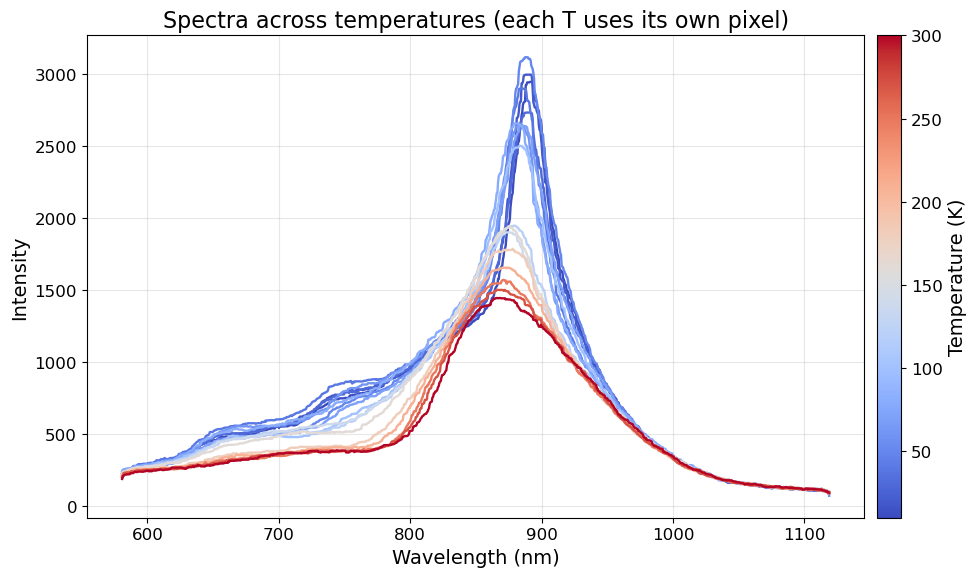

In [ ]:
# coords = [(7, 13), (7, 13), (7, 13), (7, 12), (7, 13), (7, 12), (6, 13), (7, 13), (7, 13), (7, 13), (6, 12), (7, 13), (6, 13), (6, 13), (6, 13), (6, 13), (6, 13)]
coord = [(14, 5), (14, 5), (14, 5), (14, 4), (14, 4), (14, 5), (14, 5), (14, 5), (14, 4), (14, 4), (13, 4), (14, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5)]
# coord = [(11, 15), (11, 15), (11, 15), (11, 15), (11, 15), (10, 15), (10, 15), (10, 15), (11, 15), (11, 15), (10, 15), (11, 15), (11, 15), (11, 15), (11, 15), (11, 15), (11, 15)]

# plot_temperatures_with_per_temp_coords( coord, data_obj=test, cmap_name='coolwarm' )


In [ ]:

import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap, ScalarMappable
from labellines import labelLines


def plot_all_temperatures_at_pixel(
    coordinates, *, 
    cmap_name="inferno",
    linewidth=1.8,
    alpha=0.9,
    smoothing_window=0,     # 0 = off; e.g., 7 for light smoothing
    normalize=None,         # None | "max" | "area"
    # ---- NEW offset options ----
    offset_step="auto",     # float | "auto" | 0 (0 disables). Step added per-curve.
    offset_by="rank",       # "rank" (0,1,2,...) by sorted temps OR "temp" (uses ΔT)
    offset_direction=1,     # +1 (stack upwards) or -1 (downwards)
    show_baselines=True,    # draw faint baseline per offset for orientation
    # ---- NEW vertical line option ----
    show_vmax=True,         # whether to draw vertical line at spectral max
    vmax_linestyle="--",
    vmax_linewidth=1.0,
    vmax_alpha=0.6
):
    """
    Plot spectra at pixel (x, y) for all HYP-<T>K cubes in test.data_dict on one figure,
    with optional vertical offsets (waterfall style) and vertical guides at max intensity.
    """
    # --- 1) Collect available temperatures from keys like "HYP-160K"
    temps = []
    key_by_temp = {}
    pat = re.compile(r"HYP-(\d+)K$")
    for k in test.data_dict.keys():
        m = pat.match(k)
        if m:
            t = int(m.group(1))
            temps.append(t)
            key_by_temp[t] = k
    if not temps:
        raise ValueError("No HYP-<T>K keys found in test.data_dict.")
    temps = sorted(temps)

    # --- 2) Prepare colormap & normalization over the temperature range
    cmap = get_cmap(cmap_name)
    norm = Normalize(vmin=min(temps), vmax=max(temps))
    sm = ScalarMappable(norm=norm, cmap=cmap)

    # --- 3) Get wavelength axis
    wl = test.data_dict[key_by_temp[temps[0]]].get_wavelengths()

    # --- 4) Preload spectra
    raw_specs = []
    counter = 0  
    for t in temps:
        x, y = coordinates[counter]
        counter += 1
        arr = test.data_dict[key_by_temp[t]].get_numpy_spectra()[y, x].astype(float)
        raw_specs.append(arr)

    # Optional smoothing
    def _smooth(v, k):
        if isinstance(k, int) and k >= 3 and (k % 2 == 1):
            kernel = np.ones(k) / k
            return np.convolve(v, kernel, mode="same")
        return v

    specs = [_smooth(v, smoothing_window) for v in raw_specs]

    # Optional normalization
    if normalize == "max":
        specs = [v / np.nanmax(v) if np.nanmax(v) > 0 else v for v in specs]
    elif normalize == "area":
        specs = [v / np.trapz(v, wl) if np.trapz(v, wl) != 0 else v for v in specs]

    # --- 5) Decide offset step
    if offset_step == "auto":
        p2p = [np.nanmax(v) - np.nanmin(v) for v in specs]
        typical = np.nanmedian(p2p) if len(p2p) else 1.0
        offset_step_val = 0.6 * (typical if np.isfinite(typical) and typical > 0 else 1.0)
    elif isinstance(offset_step, (int, float)):
        offset_step_val = float(offset_step)
    else:
        raise ValueError("offset_step must be float, 0, or 'auto'.")

    offsets_enabled = (offset_step_val != 0.0)
    tmin = float(min(temps))

    # --- 6) Plot
    fig, ax = plt.subplots(figsize=(10, 8), layout="constrained")

    for idx, t in enumerate(temps):
        spec = specs[idx]

        # Offset baseline
        if offsets_enabled:
            if offset_by == "rank":
                base = offset_direction * offset_step_val * idx
            elif offset_by == "temp":
                base = offset_direction * offset_step_val * ((t - tmin) / max(1.0, (max(temps) - min(temps))))
            else:
                raise ValueError("offset_by must be 'rank' or 'temp'.")
        else:
            base = 0.0

        # Plot spectrum
        yplot = spec + base
        ax.plot(wl, yplot, color=cmap(norm(t)), lw=linewidth, alpha=alpha, label=f"{t}K")

        # Add baseline
        if show_baselines and offsets_enabled:
            ax.hlines(base, wl[0], wl[-1], colors=[cmap(norm(t))], linestyles=":", linewidth=0.8, alpha=0.6)

        # Add vertical line at max
        if show_vmax:
            imax = np.nanargmax(spec)
            print(np.nanmax(spec))
            xpeak = wl[imax]
            print(xpeak)
            ax.axvline(xpeak, color=cmap(norm(t)),
                       ls=vmax_linestyle, lw=vmax_linewidth, alpha=vmax_alpha)

    # --- 7) Styling
    try:
        labelLines(plt.gca().get_lines(), fontsize=8, zorder=5)
    except Exception:
        pass

    ax.set_title(f"Spectra at pixel (x={x}, y={y}) across all temperatures", pad=10, fontsize=13)
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel("Intensity" + ("" if not normalize else f" (normalized: {normalize})"))
    ax.grid(True, which="both", linewidth=0.6, alpha=0.35)
    ax.margins(x=0.01)
    ax.set_facecolor("#f9f9fb")

    cbar = fig.colorbar(sm, ax=ax, pad=0.02)
    cbar.set_label("Temperature (K)")

    plt.show()


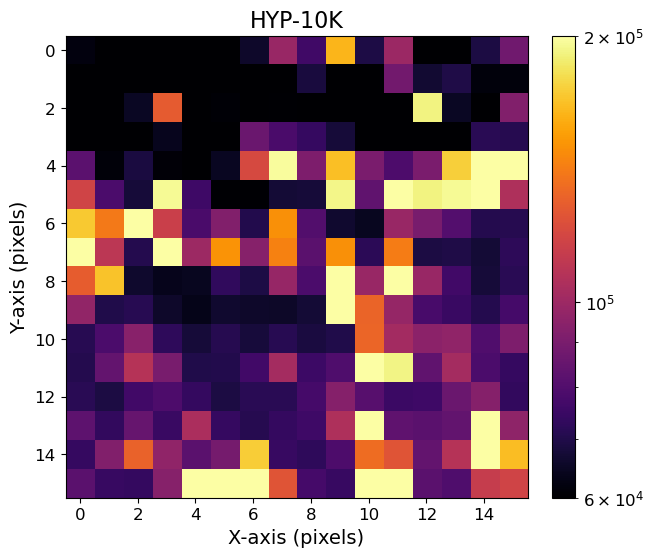

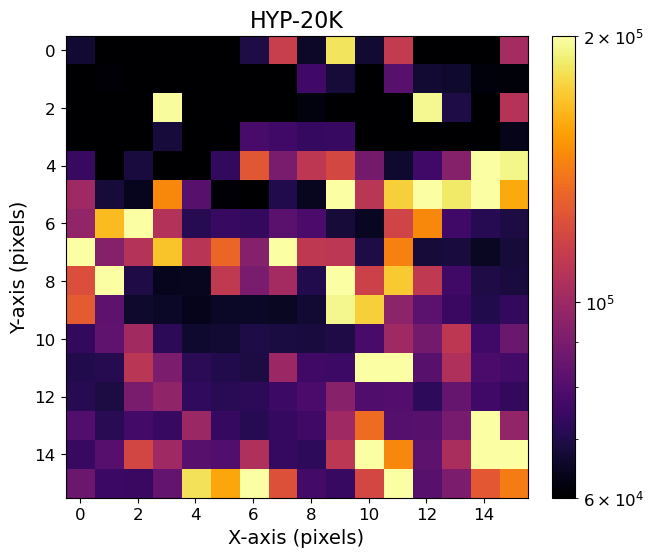

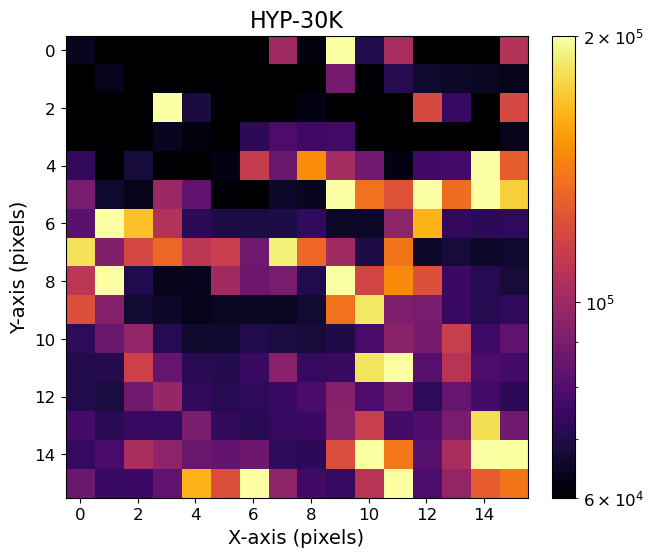

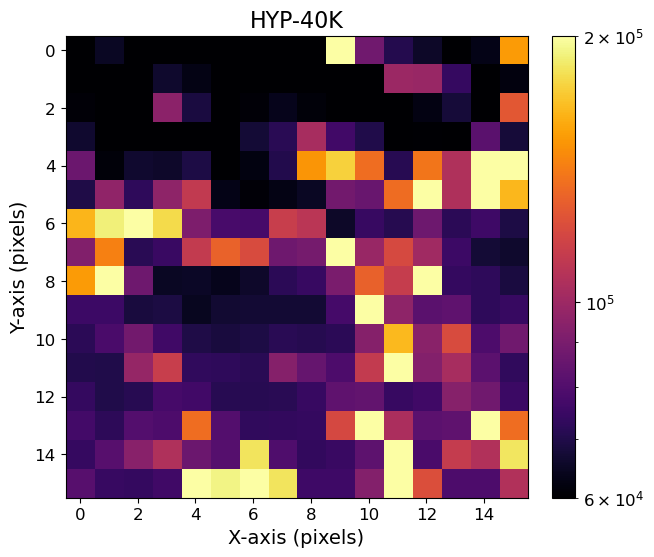

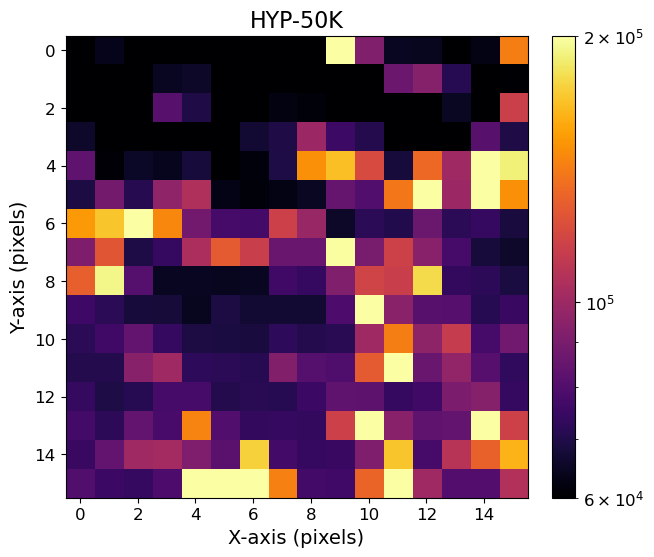

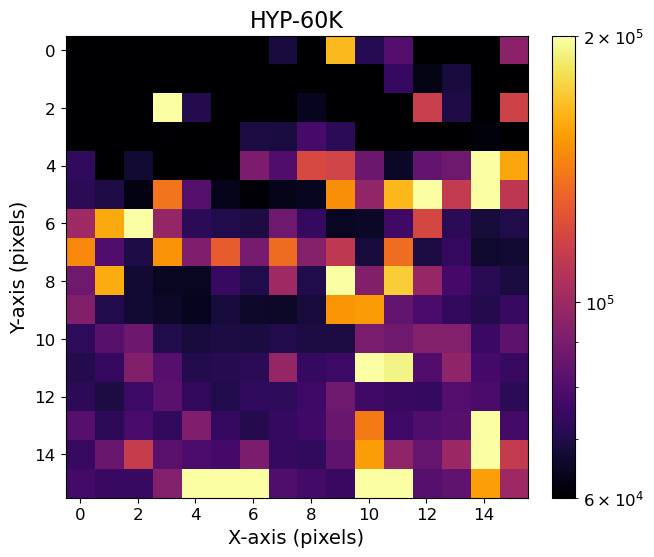

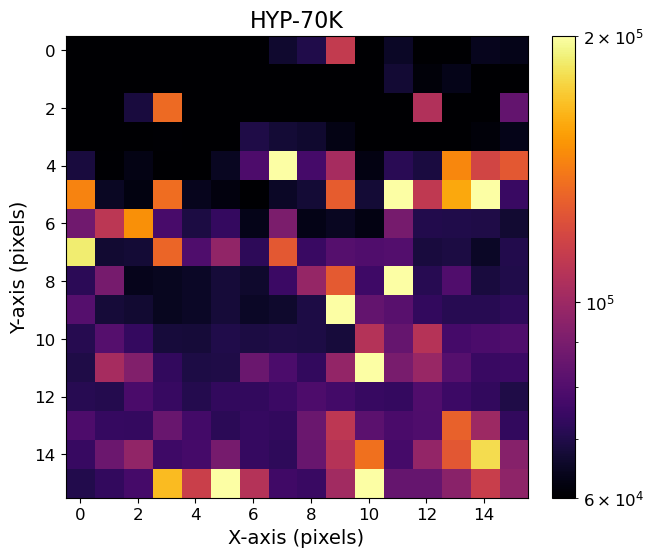

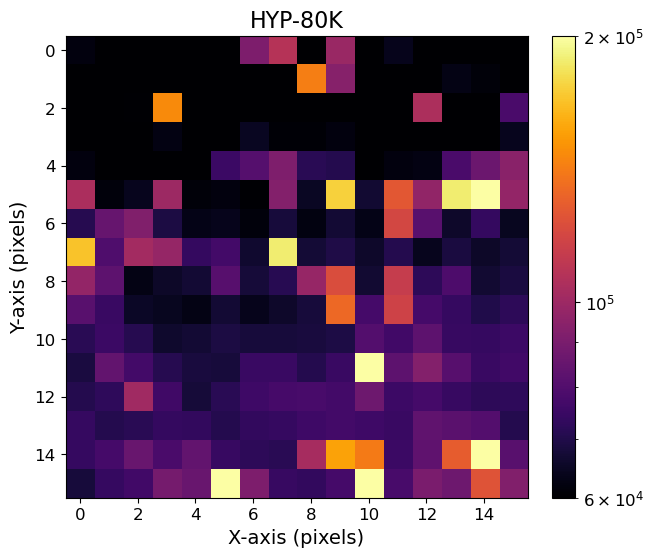

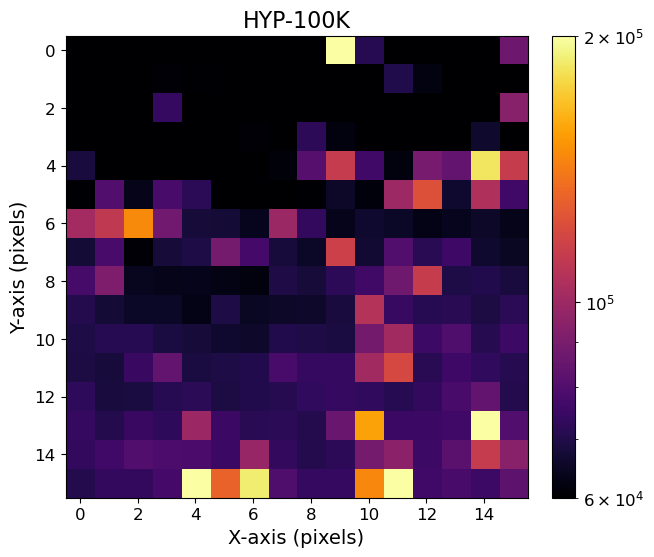

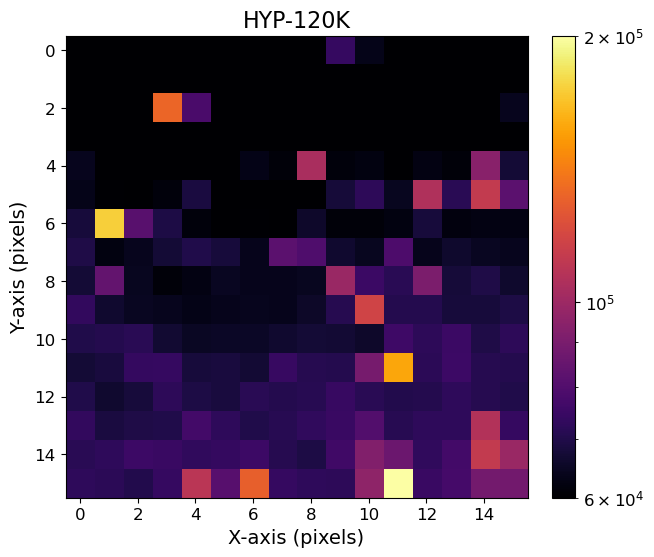

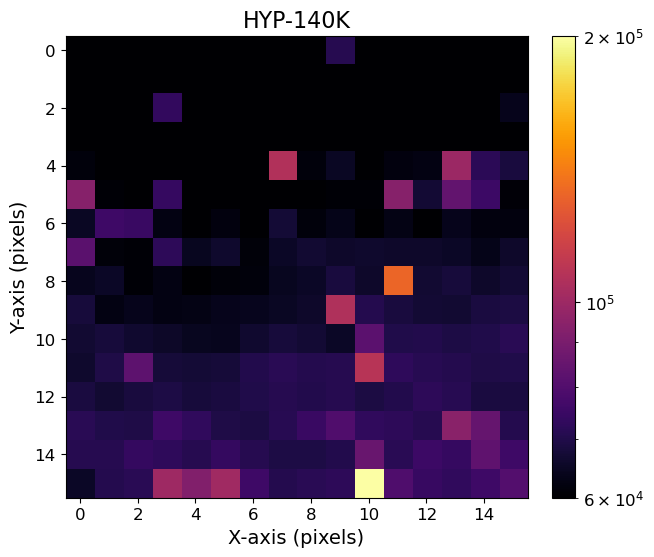

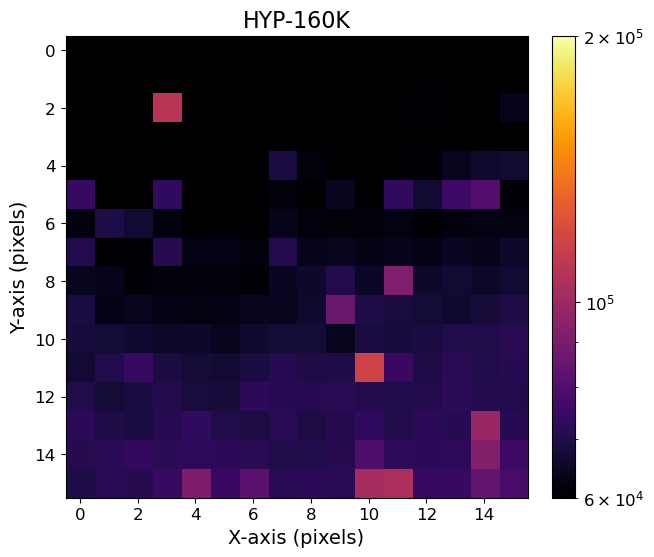

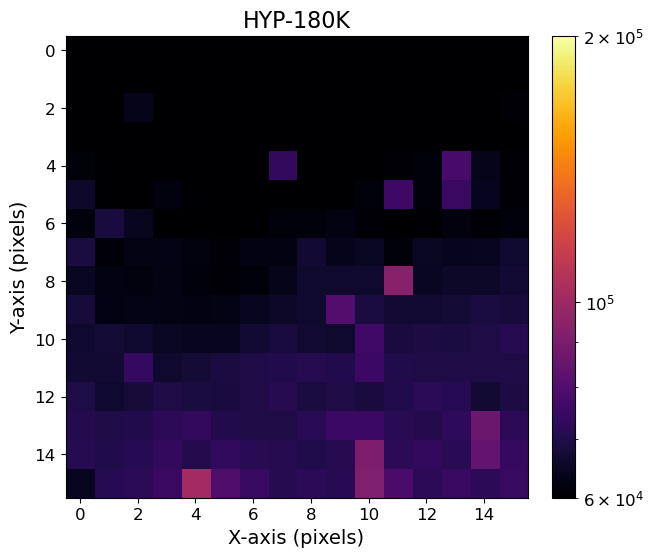

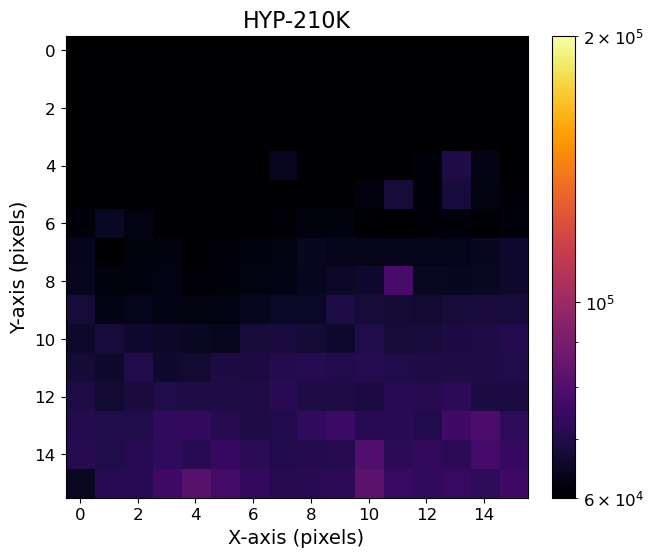

KeyboardInterrupt: 

In [30]:
import numpy as np
import matplotlib.pyplot as plt

temperatures = [10, 20, 30, 40, 50, 60, 70, 80, 100, 120, 140, 160, 180, 210, 250, 270, 300]

# 1) Load all scans (2-D arrays). Replace .get_live_scan() with your accessor if different.
scans = []
for t in temperatures:
    img = test.data_dict[f'HYP-{t}K'].plot_heatmap((950, 1050), vmin=60000, vmax=200000, title=f"HYP-{t}K")  # <- must return a 2-D numpy array
    scans.append(img)

# 2) Compute robust global limits for consistent contrast
stack = np.stack(scans, axis=0).astype(float)
vmin = np.nanpercentile(stack, 2)
vmax = np.nanpercentile(stack, 98)

# 3) Plot a grid with shared normalization and pixel tick labels
n = len(temperatures)
cols = 5
rows = (n + cols - 1) // cols  # ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
axes = np.atleast_2d(axes)  # ensure 2-D array for consistent indexing

im_last = None
for ax, t, img in zip(axes.flat, temperatures, scans):
    im_last = ax.imshow(img, cmap="gray", vmin=vmin, vmax=vmax, origin="upper", aspect="equal")
    ax.set_title(f"HYP-{t}K")

    # Pixel indices on axes (works well for ~16x16 images)
    h, w = img.shape
    ax.set_xticks(np.arange(w))
    ax.set_yticks(np.arange(h))
    ax.set_xlabel("Pixel X")
    ax.set_ylabel("Pixel Y")

# Hide any unused axes
for ax in axes.flat[n:]:
    ax.axis("off")


plt.tight_layout()
plt.show()


In [ ]:
temperatures = [10, 20, 30, 40, 50, 60, 70, 80, 100, 120, 140, 160, 180, 210, 250, 270, 300]
for t in temperatures:
    test.data_dict[f'HYP-{t}K'].plot_heatmap((950, 1050), vmin=60000, vmax=200000, title=f"HYP-{t}K")


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, get_cmap

# ---------- helpers ----------
def _get_cube(data_obj, T):
    key = f'HYP-{T}K'
    if key not in data_obj.data_dict:
        raise KeyError(f"Cube '{key}' not found")
    return data_obj.data_dict[key]

def _wmask(lam, wlim):
    if wlim is None:
        return np.ones_like(lam, dtype=bool)
    lo, hi = sorted(wlim)
    return (lam >= lo) & (lam <= hi)

def _row_normalize(arr2d, method='none', lam=None, eps=1e-12):
    if method in (None, 'none'):
        return arr2d
    if method == 'max':
        d = np.max(np.abs(arr2d), axis=1, keepdims=True) + eps
        return arr2d / d
    if method == 'area':
        if lam is not None:
            areas = np.trapz(np.abs(arr2d), lam, axis=1)[:, None] + eps
        else:
            areas = (np.sum(np.abs(arr2d), axis=1) + eps)[:, None]
        return arr2d / areas
    if method == 'zscore':
        mu = np.nanmean(arr2d, axis=1, keepdims=True)
        sd = np.nanstd(arr2d, axis=1, keepdims=True) + eps
        return (arr2d - mu) / sd
    raise ValueError(f"Unknown normalize: {method}")

# ---------- 1) Gather (wavelengths, specs) from per-T coords ----------
def gather_spectra_per_temp_coords(coords, data_obj=None, temperatures=None):
    """
    Returns:
      wavelengths: 1D array (trimmed common length)
      specs:       2D array [n_temps, L] (each row a spectrum for that T at (x,y))
    """
    if data_obj is None:
        try:
            data_obj = test
        except NameError as e:
            raise ValueError("Pass `data_obj` or define global `test`.") from e

    if temperatures is None:
        temperatures = [10, 20, 30, 40, 50, 60, 70, 80, 100, 120, 140, 160, 180, 210, 250, 270, 300]

    n = min(len(coords), len(temperatures))
    if n == 0:
        raise ValueError("Empty coords/temperatures.")

    coords = coords[:n]
    temperatures = temperatures[:n]

    wls_list, specs_list, temps_ok = [], [], []
    for (x, y), T in zip(coords, temperatures):
        try:
            cube = _get_cube(data_obj, T)
            lam = np.asarray(cube.get_wavelengths())
            spec = np.asarray(cube.get_numpy_spectra())[y, x]
            wls_list.append(lam)
            specs_list.append(spec)
            temps_ok.append(T)
        except Exception:
            # skip missing/bad entries, keep going
            continue

    if len(specs_list) == 0:
        raise RuntimeError("No valid spectra found.")

    # Trim all to common min length (simple & robust, matches your previous approach)
    min_len = min(len(w) for w in wls_list)
    lam_ref = np.asarray(wls_list[0])[:min_len]
    specs_mat = np.vstack([np.asarray(s)[:min_len] for s in specs_list])

    return lam_ref, specs_mat, temps_ok

# ---------- 2) Waterfall from (wavelengths, specs) ----------
def plot_waterfall_from_specs(
    wavelengths, specs, temperatures,
    wlim=None, normalize='none', offset='auto',
    cmap_name='coolwarm', lw=1.6, annotate=True, show_legend=False
):
    """
    Waterfall lines: each row of `specs` is one trace; color-coded by `temperatures`.
    """
    lam = np.asarray(wavelengths)
    S = np.asarray(specs)
    n = S.shape[0]
    if n == 0:
        raise ValueError("Empty specs.")

    # apply wavelength window
    mask = _wmask(lam, wlim)
    if mask.sum() < 2:
        fig, ax = plt.subplots()
        ax.text(0.5, 0.5, 'No wavelengths in selected range', ha='center', va='center', transform=ax.transAxes)
        ax.axis('off'); plt.show(); return

    lam = lam[mask]
    S = S[:, mask]

    # per-row normalization (post-window)
    Sn = _row_normalize(S, method=normalize, lam=lam)

    # auto offset
    if offset == 'auto':
        spans = np.nanmax(Sn, axis=1) - np.nanmin(Sn, axis=1)
        step = (np.nanmedian(spans) if np.isfinite(np.nanmedian(spans)) else 1.0) * 1.2
        if not np.isfinite(step) or step <= 0:
            step = 1.0
    else:
        step = float(offset)

    t_min, t_max = min(temperatures), max(temperatures)
    cmap = get_cmap(cmap_name); norm = Normalize(vmin=t_min, vmax=t_max)
    sm = ScalarMappable(norm=norm, cmap=cmap)

    fig, ax = plt.subplots(figsize=(10, 6))
    for i in range(n):
        T = temperatures[i]
        yi = Sn[i] + i * step
        ax.plot(lam, yi, lw=lw, color=sm.to_rgba(T), label=f"{T} K")
        if annotate:
            ax.text(lam[-1], yi[-1], f" {T}K", va='center', fontsize=9, color=sm.to_rgba(T))

    ax.set_title("Waterfall (spectra × wavelength)")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel(f"Intensity (+{step:g} per trace)")
    ax.grid(True, alpha=0.25)

    if show_legend and n <= 15:
        ax.legend(frameon=False, ncols=2, fontsize=9)

    cbar = plt.colorbar(sm, ax=ax, pad=0.015, fraction=0.04)
    cbar.set_label("Temperature (K)")

    fig.tight_layout()
    plt.show()

# ---------- 3) Heatmap like your previous snippet ----------
def plot_spectral_heatmap(
    wavelengths, specs,
    wlim=None, cmap_name='inferno',
    post_normalize='none',   # 'none' | 'max' | 'area' | 'zscore'
    vmin=None, vmax=None,
    title='Heatmap (post-normalization)'
):
    """
    Heatmap of spectra vs wavelength, matching your earlier flipping + windowing logic.
    - Rows = spectra index (top = last spectrum, to match your reverse display)
    - Columns = wavelength (reversed to match your code)
    """
    lam_full   = np.asarray(wavelengths)
    specs_full = np.asarray(specs)

    # optional per-row normalization before plotting
    specs_full = _row_normalize(specs_full, method=post_normalize, lam=lam_full)

    # match your previous orientation:
    hm_specs = specs_full[::-1, :]    # flip rows
    hm_specs = hm_specs[:, ::-1]      # flip columns
    lam      = lam_full[::-1]         # reversed wavelength axis to match columns

    fig, ax = plt.subplots(figsize=(10, 6))
    cmap = get_cmap(cmap_name)

    if wlim is not None:
        lo, hi = sorted(wlim)
        lo = max(lo, float(lam.min()))
        hi = min(hi, float(lam.max()))
        mask = (lam >= lo) & (lam <= hi)

        if mask.sum() < 2:
            ax.clear()
            ax.text(0.5, 0.5, 'No wavelengths in selected range',
                    ha='center', va='center', transform=ax.transAxes)
            ax.axis('off')
            plt.show()
            return

        lam_plot = lam[mask]
        hm_plot  = hm_specs[:, mask]

        y0, y1 = (0, hm_plot.shape[0])
        x0, x1 = (lam_plot.min(), lam_plot.max())

        im = ax.imshow(hm_plot, aspect='auto', origin='upper',
                       extent=[x0, x1, y0, y1], cmap=cmap, vmin=vmin, vmax=vmax)
        ax.set_title(f'Heatmap (λ ∈ [{lo:.2f}, {hi:.2f}])')
    else:
        y0, y1 = (0, hm_specs.shape[0])
        x0, x1 = (lam.min(), lam.max())

        im = ax.imshow(hm_specs, aspect='auto', origin='upper',
                       extent=[x0, x1, y0, y1], cmap=cmap, vmin=vmin, vmax=vmax)
        ax.set_title(title)

    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Spectrum index')

    cbar = plt.colorbar(im, ax=ax, pad=0.015, fraction=0.04)
    cbar.set_label('Intensity')

    fig.tight_layout()
    plt.show()


In [56]:
# coords = [(7, 13), (7, 13), (7, 13), (7, 12), (7, 13), (7, 12), (6, 13), (7, 13), (7, 13), (7, 13), (6, 12), (7, 13), (6, 13), (6, 13), (6, 13), (6, 13), (6, 13)]
# coords = [(14, 5), (14, 5), (14, 5), (14, 4), (14, 4), (14, 5), (14, 5), (14, 5), (14, 4), (14, 4), (13, 4), (14, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5)]
coords = [(11, 15), (11, 15), (11, 15), (11, 15), (11, 15), (10, 15), (10, 15), (10, 15), (11, 15), (11, 15), (10, 15), (11, 15), (11, 15), (11, 15), (11, 15), (11, 15), (11, 15)]

# plot_temperatures_with_per_temp_coords( coord, data_obj=test, cmap_name='coolwarm' )


/var/folders/st/jpm5ygyj64l8nxn5kt0q37wr0000gn/T/ipykernel_7786/1331417652.py:121: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(cmap_name); norm = Normalize(vmin=t_min, vmax=t_max)


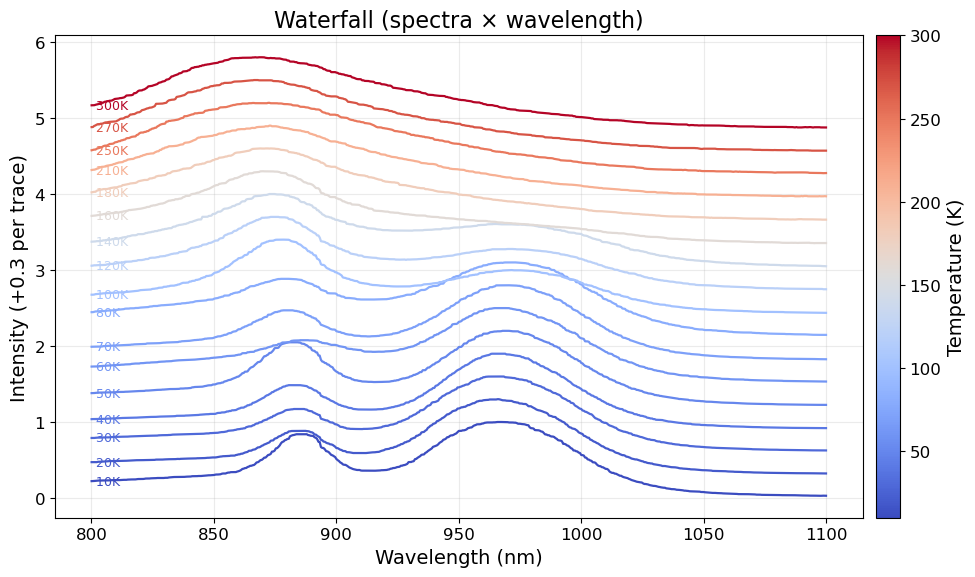

/var/folders/st/jpm5ygyj64l8nxn5kt0q37wr0000gn/T/ipykernel_7786/1331417652.py:171: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(cmap_name)


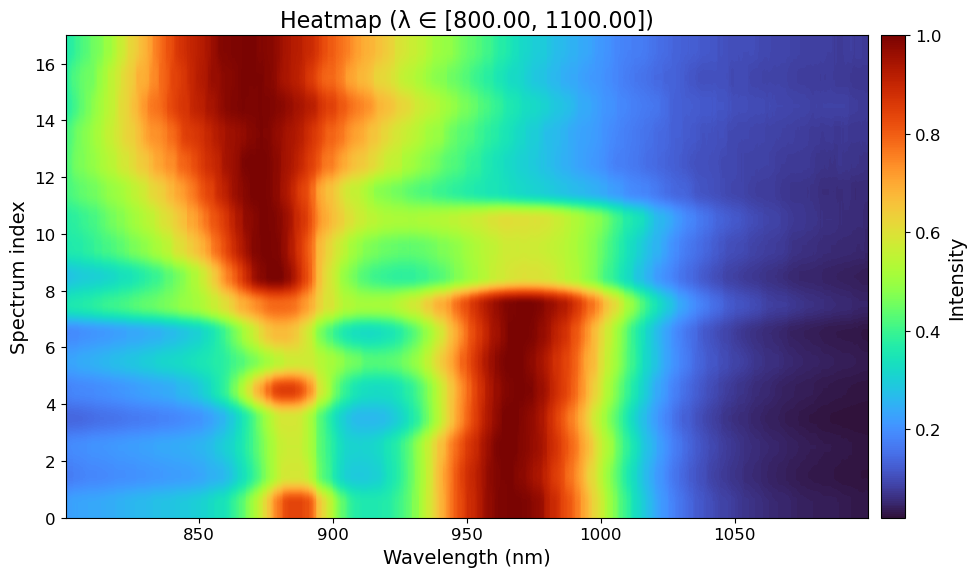

In [58]:
# Build (wavelengths, specs) from your cubes using per-T coords:
lam, specs, temps_ok = gather_spectra_per_temp_coords(coords, data_obj=test, temperatures=temperatures)

# A) Waterfall (same colors as temperature)
plot_waterfall_from_specs(
    lam, specs, temps_ok,
    wlim=(800, 1100), normalize='max', offset='0.3', cmap_name='coolwarm'
)

# B) Spectral heatmap exactly like your previous code
plot_spectral_heatmap(
    lam, specs,
    wlim=(800, 1100), cmap_name='turbo',
    post_normalize='max',   # or 'none' to plot raw
    title='Heatmap (post-normalization)'
)
